In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
originalImage = cv2.imread("/content/drive/MyDrive/Presets/holi.png")
originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)

In [5]:
reshapedImage = np.float32(originalImage.reshape(-1, 3))

In [6]:
numberOfClusters = 2

stopCriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.1)

In [7]:
ret, labels, clusters = cv2.kmeans(reshapedImage, numberOfClusters, None, stopCriteria, 10, cv2.KMEANS_RANDOM_CENTERS)

clusters = np.uint8(clusters)

intermediateImage = clusters[labels.flatten()]
clusteredImage = intermediateImage.reshape((originalImage.shape))

cv2.imwrite("clusteredImage.jpg", clusteredImage)

True

In [8]:
# Remove 1 cluster from image and apply canny edge detection
removedCluster = 1

cannyImage = np.copy(originalImage).reshape((-1, 3))
cannyImage[labels.flatten() == removedCluster] = [0, 0, 0]

cannyImage = cv2.Canny(cannyImage,100,200).reshape(originalImage.shape)
cv2.imwrite("cannyImage.jpg", cannyImage)

True

In [9]:
initialContoursImage = np.copy(cannyImage)
imgray = cv2.cvtColor(initialContoursImage, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(imgray, 50, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(initialContoursImage, contours, -1, (0,0,255), cv2.CHAIN_APPROX_SIMPLE)
cv2.imwrite("initialContoursImage.jpg", initialContoursImage)

True

In [10]:
cnt = contours[0]
largest_area=0
index = 0
for contour in contours:
    if index > 0:
        area = cv2.contourArea(contour)
        if (area>largest_area):
            largest_area=area
            cnt = contours[index]
    index = index + 1

biggestContourImage = np.copy(originalImage)
cv2.drawContours(biggestContourImage, [cnt], -1, (0,0,255), 3)
cv2.imwrite("biggestContourImage.jpg", biggestContourImage)

True

In [12]:
from PIL import Image
I = Image.open("/content/drive/MyDrive/Presets/holi.png")

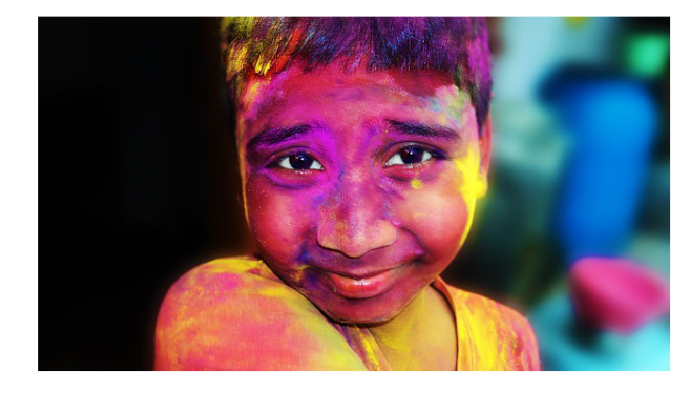

In [13]:
a = np.asarray(I,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(a)
plt.axis('off')
plt.show()

In [14]:
w, h = I.size
colors = I.getcolors(w * h)
num_colors = len(colors) 
num_pixels = w*h 

print ('Number of pixels = ', num_pixels)
print ('Number of colors = ', num_colors)

Number of pixels =  291100
Number of colors =  118709


In [15]:
x, y, z = a.shape
print('a shape ', a.shape)

a1 = a.reshape(x*y, z)
print('a1 shape ', a1.shape)

a shape  (410, 710, 4)
a1 shape  (291100, 4)


In [23]:
from sklearn.cluster import KMeans
n = 48
k_means = KMeans(n_clusters=n)
k_means.fit(a1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=48, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
!pip3 install KMeans

  Created wheel for KMeans: filename=kmeans-1.0.2-cp37-cp37m-linux_x86_64.whl size=11757 sha256=1964e327231df4608058fd81dc505e0d75787576a330ca50174d4ff9f6beb9e8
  Stored in directory: /root/.cache/pip/wheels/10/05/77/2735fd2f7a0b4d86cb7a83be2a56807cf706d5d27f742c6482
Successfully built KMeans


In [24]:
centroids = k_means.cluster_centers_
labels = k_means.labels_

In [25]:
print('centroids shape ', centroids.shape)
print('labels shape ', labels.shape)

centroids shape  (48, 4)
labels shape  (291100,)


In [26]:
a2 = centroids[labels]
print('a2 shape ', a2.shape)

a3 = a2.reshape(x,y,z)
print('a3 shape ', a3.shape)

a2 shape  (291100, 4)
a3 shape  (410, 710, 4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


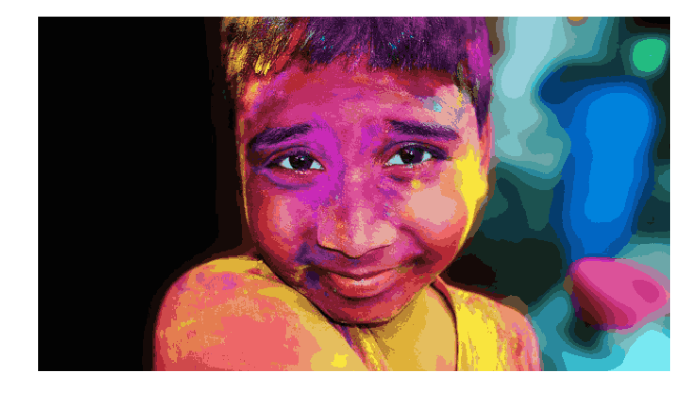

In [27]:
plt.figure(figsize=(12,12))
plt.imshow(a3)
plt.axis('off')
plt.show()

In [28]:
a4 = np.floor(a3*255)
a5 = a4.astype(np.uint8)

I1 = Image.fromarray(a5)
I1.save("colors.png")

In [29]:
w, h = I1.size
colors = I1.getcolors(w * h)
num_colors = len(colors) 
num_pixels = w*h 

print ('Number of pixels = ', num_pixels)
print ('Number of colors = ', num_colors)

Number of pixels =  291100
Number of colors =  48
